In [92]:
from numpy import *
import operator
def file2maritx(filename):
    fr=open(filename)
    arrayOlines=fr.readlines()
    numberOfLines=len(arrayOlines)
    returnMat=zeros((numberOfLines,3))  #特征向量
    classLabelVector=[]
    index=0
    for line in arrayOlines:
        line=line.strip()
        listFromLine=line.split('\t')
        returnMat[index,:]=listFromLine[0:3]
        #labels = {'didntLike':1,'smallDoses':2,'largeDoses':3}  # 新增
        classLabelVector.append(int(listFromLine[-1]))
        index+=1
    return returnMat,classLabelVector

In [93]:
datingDataMat,datingLabels=file2maritx('datingTestSet2.txt')

In [94]:
print(datingDataMat)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]


In [95]:
print(datingLabels)

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 3, 1, 3, 2, 3, 1, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 2, 3, 3, 3, 3, 1, 2, 3, 1, 1, 1, 3, 1, 3, 2, 2, 1, 3, 1, 3, 2, 2, 1, 2, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 3, 2, 3, 1, 3, 1, 3, 3, 1, 3, 2, 1, 3, 

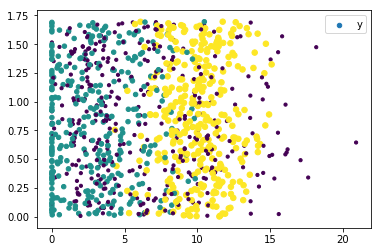

In [96]:
import matplotlib 
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],10*array(datingLabels),15*array(datingLabels))
plt.legend('y2')
plt.show()

In [97]:
def autoNorm(dataSet):
    minVals=dataSet.min(0)
    maxVals=dataSet.max(0)
    ranges=maxVals-minVals
    normDataSet=zeros(shape(dataSet))
    m=dataSet.shape[0]
    #print(m)
    normDataSet=dataSet-tile(minVals,(m,1))
    normDataSet=normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

In [98]:
norm,ranges,minVals=autoNorm(datingDataMat)
print(norm)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


In [99]:
def classify0(inX,dataSet,labels,k):
    dataSetSize=dataSet.shape[0]
    #print(dataSetSize)
    diffMat=tile(inX,(dataSetSize,1))-dataSet
    sqDiffMat=diffMat**2
    sqDistances=sqDiffMat.sum(axis=1)
    distances=sqDistances**0.5
    sortedDistIndicies=distances.argsort()#距离的排序
    classCount={}
    for i in range(k):
        voteIlabel=labels[sortedDistIndicies[i]]
        #print(voteIlabel)
        classCount[voteIlabel]=classCount.get(voteIlabel,0)+1
        #print(classCount)
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)  #标签选举的排序，reverse后面指的使用升序还是降序排列
    #print(sortedClassCount)
    return sortedClassCount[0][0]

In [100]:
def datingClassTest():
    hoRatio=0.10
    datingDataMat,datingLabels=file2maritx('datingTestSet2.txt')
    normMat,ranges,minVals=autoNorm(datingDataMat)
    m=normMat.shape[0]
    numTestVecs=int(m*hoRatio)
    errorCount=0.0
    for i in range(numTestVecs):
        classifierResult=classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print (errorCount)

In [101]:
print(datingClassTest())

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe